# E2E ML Project

In [ ]:
# @title Setup
# Common imports
import numpy as np
import pandas as pd
import os


# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## Data

- Retrieve
- Explore

### Automate data retrieval process

0. Create appropriate directories using `os.path` and `os.mkdirs`
1. Download the raw data file using `urllib.request.urlretreive`
2. Extract it using `tarfile.open` and `.extractall` function

In [ ]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("../","datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

fetch_housing_data()

In [ ]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

housing = load_housing_data()

### Explore

Don't modify the original raw data...

- Descriptive statistics
    - `.info()`
    - `.describe()`
    - sorted counts
    - Sorted Correlation matrix
    - Create new categories from quantitative data using `pd.cut()`

- Split the data
    - Into
        - Train
        - Test
        - Exploration (optional)
    - using `StratifiedShuffleSplit` (maintain strata)


### Descriptive Statistics

- Observe the most seemingly important variables. Use judgement

In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
housing['median_house_value'].value_counts().sort_values()
housing['median_income'].describe()

count    20640.000000
mean         3.870671
std          1.899822
min          0.499900
25%          2.563400
50%          3.534800
75%          4.743250
max         15.000100
Name: median_income, dtype: float64

In [ ]:
corr_matrix = housing.drop(columns=['ocean_proximity']).corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [ ]:
housing['income_cat'] = pd.cut(housing['median_income'],
       bins=[0.,1.5,3.0,4.5, 6, np.inf],
       labels = [1, 2, 3, 4, 5]
       )

### Split Data

- Split with the same distribution in test and train so that similar income categories end up in each

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

stratified = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for test_index, train_index in stratified.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[test_index]
    strat_test_set = housing.loc[train_index]

strat_train_set.info()

Define Relevant Variables

## Visualize & Gain insights

- barplot/piechart
- scatter plot (with proper channels of information: color, shape, size etc)
- scatter_matrix

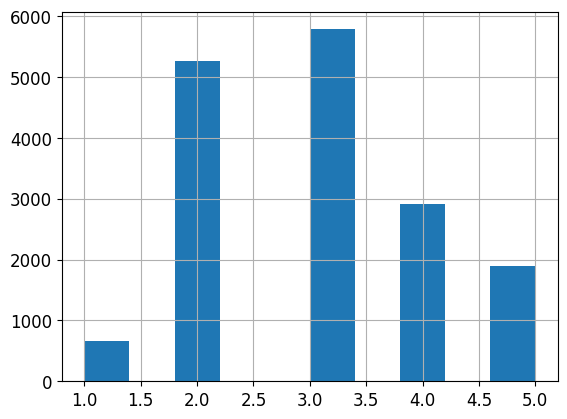

In [ ]:
strat_train_set['income_cat'].hist()
plt.show()

count    16512.000000
mean         3.875884
std          1.904931
min          0.499900
25%          2.566950
50%          3.541550
75%          4.745325
max         15.000100
Name: median_income, dtype: float64


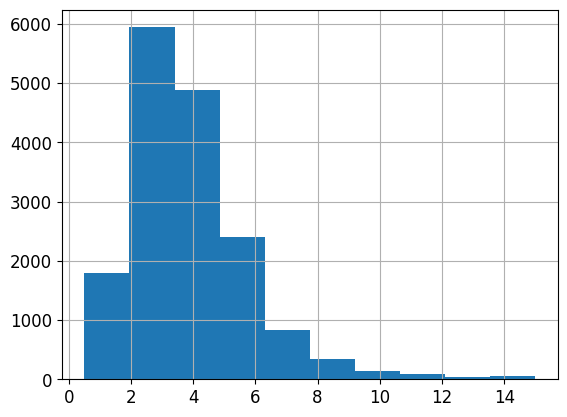

In [ ]:
print(strat_train_set['median_income'].describe())
strat_train_set['median_income'].hist()
plt.show()

[0.35053295 0.31879845 0.17635659 0.11434109 0.03997093]


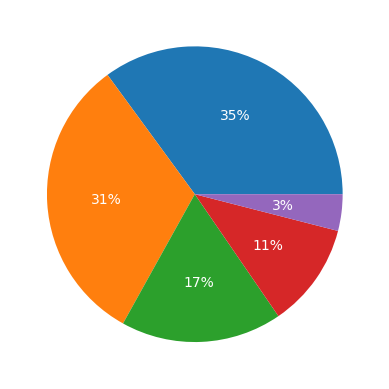

In [ ]:
def make_pie(a):
    print(a.values)
    plt.pie(a,labels=a.index, autopct=f"%d%%",textprops={'color':'#fff'})
    plt.show()
make_pie(strat_test_set['income_cat'].value_counts()/len(strat_test_set))

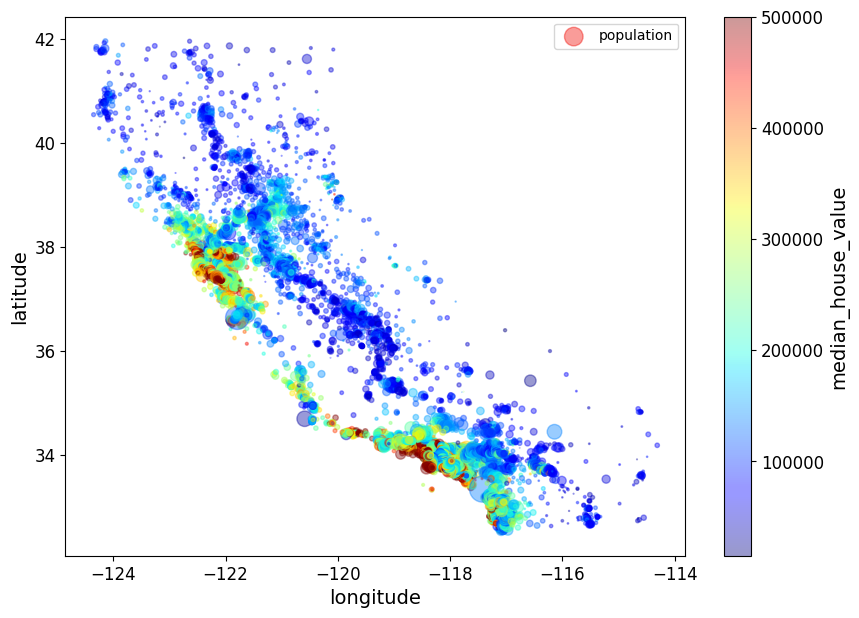

In [ ]:
# housing['scaled_population'] = housing['population'].apply(lambda x: x/100)
housing.plot(kind="scatter",x='longitude',y='latitude',alpha=.4,
             figsize= (10,7),
             s=housing['population']/100, label="population",
             c="median_house_value", colorbar=True, cmap=plt.get_cmap('jet'))
# housing.drop('scaled_population',axis=1)
plt.show()

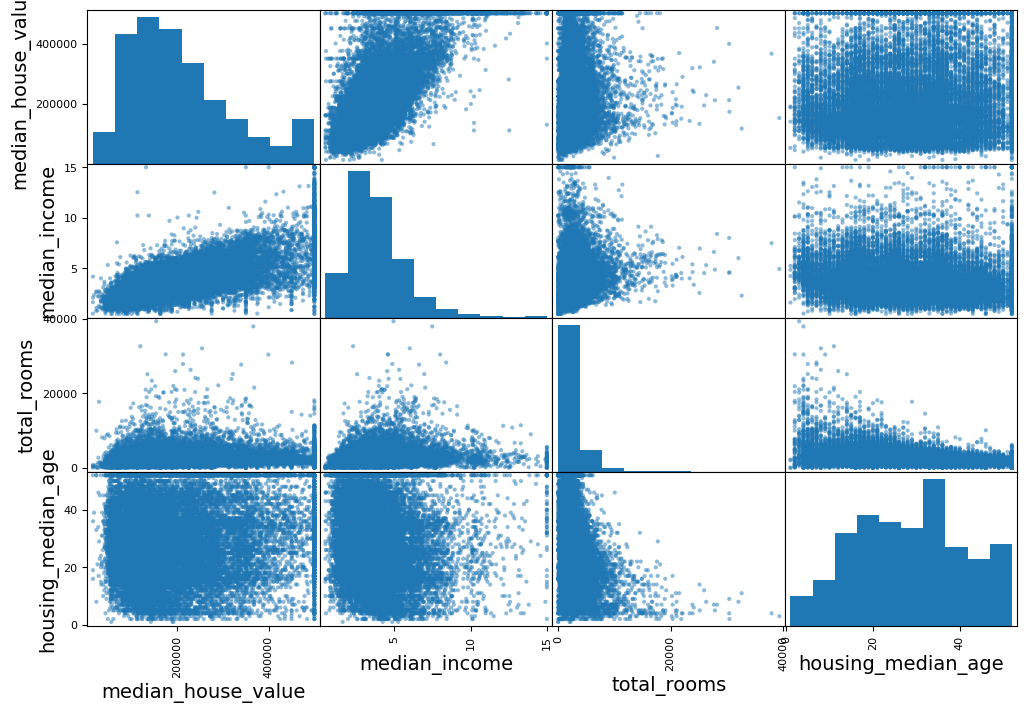

In [ ]:
from pandas.plotting import scatter_matrix
# scatter_plot = scatter_matrix(housing) # bad idea: too many variables
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes],figsize=(12,8))
plt.show()

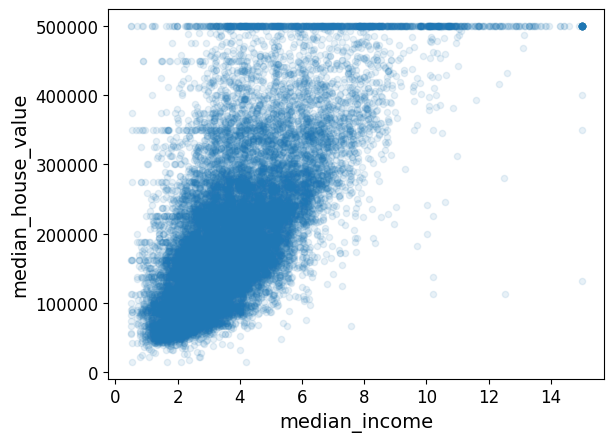

In [ ]:
housing.plot(kind="scatter", x="median_income",y="median_house_value",
            alpha=0.1,)
plt.show()

## Prepare Data

- Derived features (e.g. Population per household)
- Missing Values
    - Omit
    - Impute
- Encode (categorical variables)
- Define the $y$ and $X$ and apply the transformation to them


One mistake that you did was that you are using indices later `ix` but you are not using the indices of the raw data because the raw data was altered during the exploration phase.

```python
housing['rooms_per_household'] = housing['total_rooms'] / housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms'] / housing['total_rooms']
housing['population_per_household'] = housing['population'] / housing['households']
```

In [ ]:
# 1. get rid of the corresponding districts
housing_clean = housing.dropna(subset=['total_bedrooms'])
# 2. get rid of the entire column
housing_clean = housing.drop('total_bedrooms', axis=1)

### (Manually) Impute & Encode

- Impute using a relavant strategy
- Encode
    - Ordinal (when there is inherent order, e.g. typical survey responses)
    - One-hot encode (when there is no inherent order, ocean proximity)

In [ ]:
# 3. replace it with some value (e.g. mean/median)
median = housing['total_bedrooms'].median()

# 4. REMOVE IT ALTOGETHER
# housing['total_bedrooms'].fillna(median, inplace=True)
# Use this from pandas 3.0
# housing.fillna({'total_bedrooms': median}, inplace=True)

or use `SimpleImputer`

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

# Only numerical values
housing_num = housing.drop('ocean_proximity', axis=1)
imputer.fit(housing_num)
X_train_num = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X_train_num, columns=housing_num.columns, index= housing_num.index)

# ========== MISC ===========
# imputer.strategy
# imputer.statistics_
# housing_num.median().values
# ===========================

`OrdinalEncoder`

In [ ]:
housing_cat = housing[['ocean_proximity']]

from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

# ========== MISC ===========
# ordinal_encoder.categories_
# ===========================

housing_cat_encoded # array

array([[3.],
       [3.],
       [3.],
       ...,
       [1.],
       [1.],
       [1.]])

`OneHotEncoder`

In [ ]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
cat_encoder.fit(housing_cat)
housing_cat_1hot = cat_encoder.transform(housing_cat)


# ========== MISC ===========
# housing_cat_1hot.toarray() # back to numpy array
# cat_encoder.categories_
# ===========================

housing_cat_1hot # SciPy sparse matrix (capable of handling categories with 1000s of levels, numpy array would bonk)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 20640 stored elements and shape (20640, 5)>

### Transformers & Pipelines

- Write a transformer to apply all the data cleaning steps (defined above) at once.
- Pipeline to *impute*, *transform* and *scale* at once

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

housing_num = housing.drop(['ocean_proximity'], axis=1)
rooms_ix, bedrooms_ix, population_ix, households_ix, value_ix  = 3, 4, 5, 6, 8
housing_columns = housing.columns.delete(value_ix)

class LabelRemover(BaseEstimator, TransformerMixin):
    def __init__(self, label_name = 'median_house_value'):
        self.label_name = label_name

    def fit(self, X, y=None):
        return self

    def transform(self, X: pd.DataFrame):
        X = X.drop(self.label_name, axis=1)
        return X


class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    '''
    This transforms e raw data `housing` to `X` (drops )
    '''
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            self.column_names_added_ = ['rooms_per_household', 'population_per_household', 'bedrooms_per_room']
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            self.column_names_added_ = ['rooms_per_household', 'population_per_household']
            return np.c_[X, rooms_per_household, population_per_household]

In [ ]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)
housing_add = pd.DataFrame(housing_extra_attribs , columns=list(housing.columns)+attr_adder.column_names_added_, index=housing.index)
housing_add.shape # 11 + 2 (columns added)

(20640, 13)

Creating the `Pipeline`

- Numerical pipeline
- Combine Numerical & Categorical columns using `ColumnTransformer`

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ('label_remover', LabelRemover()),
    ('imputer', SimpleImputer(strategy='median')),
    ('attrib_adder', CombinedAttributesAdder(add_bedrooms_per_room=False)),
    ('std_scaler', StandardScaler())
])

In [ ]:
housing_num_tr = num_pipeline.fit_transform(housing_num)
num_pipeline.named_steps['attrib_adder']
housing_piped = pd.DataFrame(housing_num_tr, columns=list(housing_num.columns.delete(value_ix))+num_pipeline.named_steps['attrib_adder'].column_names_added_, index= housing_num.index)

housing_piped.shape

(20640, 11)

In [ ]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']


full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs)
])

In [ ]:
X_train = full_pipeline.fit_transform(strat_train_set)
y_train = strat_train_set['median_house_value'].copy()


# ========== MISC ===========
# How to access specific steps from the transformer?
# full_pipeline.named_transformers_['num'].named_steps['attrib_adder'].column_names_added_
# ===========================

## Select & Train

Note: $y$ represents **Labels**

- Be comfortable applying transformations to any data
- Decide and run the model
    - Linear Regression
    - Decision Tree Regressor
    - Random Forest Regressor
- For each model
    - root `mean_squared_error` (rmse)
    - Cross Validation

`LinearRegression`

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

Apply transformations to data and performing predictions from a model:

In [ ]:
# Data
some_data = strat_train_set.iloc[:5]
some_labels = y_train.iloc[:5]

# Transform
some_data_prepared = full_pipeline.transform(some_data)

some_predictions = lin_reg.predict(some_data_prepared)
pd.DataFrame(np.c_[some_labels, some_predictions], columns=['Labels (actual)', 'Predictions'], index= some_data.index)

Labels (actual)    Predictions
12655          72100.0   87112.228684
15502         279600.0  311287.678951
2908           82700.0  149138.756997
14053         112500.0  181605.044171
20496         238300.0  242876.060794

### Model Metrics

- Root mean squared error
- TIP: Make reusable functions for this

In [ ]:
from sklearn.metrics import mean_squared_error

y_pred = lin_reg.predict(X_train)
lin_mse = mean_squared_error(y_train, y_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

np.float64(68740.3505914331)

`DecisionTreeRegressor`

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
y_pred = tree_reg.predict(X_train)

tree_mse = mean_squared_error(y_train, y_pred)
tree_rmse = np.sqrt(tree_mse)
tree_rmse
# Severely Overfitting

np.float64(0.0)

`RandomForestRegressor`

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# rf_reg = RandomForestRegressor()
# rf_reg.fit(X_train, y_train)

In [ ]:
# y_pred = rf_reg.predict(housing_prepared)

# rf_mse = mean_squared_error(y_train, y_pred)
# rf_rmse = np.sqrt(rf_mse)
# rf_rmse

### Cross Validation

- This expects a utility function, greater is better. (Opposite of Cost function)

- The utility function is negative, and increases as the predictive power increases

- Zero is highest

In [ ]:
from sklearn.model_selection import cross_val_score

def display_scores(scores: np.ndarray):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard Deviation", scores.std())

In [ ]:
scores = cross_val_score(tree_reg, X_train, y_train,
                         scoring='neg_mean_squared_error', cv=10)

tree_rmse_scores = np.sqrt(-scores)
display_scores(tree_rmse_scores)

Scores: [71237.35168416 68357.52527279 68195.75406674 72272.463544
 68562.2497614  76326.9623925  70896.87760963 70455.49034824
 68518.77870903 71425.22279391]
Mean: 70624.86761823995
Standard Deviation 2368.0852445976143


In [ ]:
scores = cross_val_score(lin_reg, X_train, y_train,
                         scoring="neg_mean_squared_error", cv=10)

lin_rmse_scores = np.sqrt(-scores)
display_scores(lin_rmse_scores)

Scores: [72195.7979865  64520.15075203 67849.52511021 69087.47348499
 66747.91999171 72801.81116412 70339.52226055 69242.33276019
 66692.04641613 70356.66638109]
Mean: 68983.3246307523
Standard Deviation 2452.682376861631


In [ ]:
# # DON'T RUN. TAKES TOO MUCH TIME!!
# scores = cross_val_score(rf_reg, X_train, y_train
#                          scoring="neg_mean_squared_error", cv=10)

# rf_rmse_scores = np.sqrt(-scores)
# display_scores(rf_rmse_scores)

## Fine-Tune

- Grid search CV
- Feature importances

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring="neg_mean_squared_error",
                           return_train_score=True)

grid_search.fit(X_train, y_train)

# ========== MISC ===========
# grid_search.best_params_
# grid_search.best_estimator_
# ===========================

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

View Results and determine important features

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63063.86122253507 {'max_features': 2, 'n_estimators': 3}
55156.84196984595 {'max_features': 2, 'n_estimators': 10}
52905.0930835154 {'max_features': 2, 'n_estimators': 30}
60784.62307278264 {'max_features': 4, 'n_estimators': 3}
53524.10514849476 {'max_features': 4, 'n_estimators': 10}
50719.11786462384 {'max_features': 4, 'n_estimators': 30}
59942.50730403312 {'max_features': 6, 'n_estimators': 3}
52887.13885955089 {'max_features': 6, 'n_estimators': 10}
50711.59935939004 {'max_features': 6, 'n_estimators': 30}
59081.19617320614 {'max_features': 8, 'n_estimators': 3}
51880.750719423966 {'max_features': 8, 'n_estimators': 10}
50625.93683919922 {'max_features': 8, 'n_estimators': 30}
62169.33046545155 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54476.43461087879 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59809.79004268255 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52925.59007801043 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10

In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_

# ...num_attribs already defined above...
extra_attribs = full_pipeline.named_transformers_['num'].named_steps['attrib_adder'].column_names_added_
cat_one_hot_attribs = list(
    full_pipeline.named_transformers_['cat'] .categories_[0] )

attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip([f"{x:5.5f}" for x in feature_importances], attributes), reverse=True)

[('0.35517', 'median_income'),
 ('0.12696', '<1H OCEAN'),
 ('0.11552', 'rooms_per_household'),
 ('0.11141', 'median_house_value'),
 ('0.06340', 'longitude'),
 ('0.05956', 'latitude'),
 ('0.04892', 'housing_median_age'),
 ('0.04060', 'income_cat'),
 ('0.01746', 'population'),
 ('0.01723', 'total_bedrooms'),
 ('0.01695', 'total_rooms'),
 ('0.01686', 'households'),
 ('0.00456', 'population_per_household'),
 ('0.00295', 'NEAR BAY'),
 ('0.00236', 'ISLAND'),
 ('0.00008', 'INLAND')]

### Final Model

- Incorporate the best parameters.
- The conclusion or takeaway of this analysis

In [ ]:
final_model = grid_search.best_estimator_

X_test = full_pipeline.transform(strat_test_set)
y_test = strat_test_set['median_house_value'].copy()

final_predictions = final_model.predict(X_test)
final_rmse = np.sqrt(mean_squared_error(y_test, final_predictions))
print(f'RSME: {final_rmse}')

RSME: 48901.503020024174


## Save & Load

In [ ]:
import joblib

# save
joblib.dump(final_model, "housing_final.pkl")

# load
final_model_loaded = joblib.load('housing_final.pkl')

In [ ]:
housing_test = full_pipeline.transform(housing.iloc[1000:2000])
housing_test.shape

final_model_loaded.predict(housing_test)[:10]

array([162076.66666667, 157296.66666667, 134113.33333333, 160950.        ,
       188446.66666667, 244736.66666667, 175210.        , 216380.03333333,
       166066.66666667, 174626.66666667])